# GOOD FAST CHEAP - 20 Feature Constraint - Modeling

---

## Import Libraries

In [1]:
# Data Manipulation
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

# Sci-kit learn
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, \
ConfusionMatrixDisplay

# Tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers.experimental import Adam

# XGBoost
from xgboost import XGBClassifier

---

## Reading cleaned data 

In [2]:
# Read the data
df = pd.read_csv('../data/train_cleaned.csv', index_col = [0])

---

## Modeling

In [3]:
# Select X and y
X = df.drop(columns=['wage'])
y = df['wage']

In [4]:
X.head(2)

,age,workclass,education,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,hours_per_week,native_country,is_male
0,39,Other,Other,13,Other,Other,Group3,2174,0,40,United-States,1
1,50,Other,Other,13,1.0,Group1,Group1,0,0,13,United-States,1


In [5]:
# Dummy up categorical variable
X = pd.get_dummies(data=X, 
                   columns = ['native_country','workclass','occupation',
                              'education','relationship','marital_status'],
                   drop_first = True)

In [6]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2,
                                                    stratify=y,
                                                    random_state = 42)

In [7]:
# Check shape
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((26048, 17), (6513, 17), (26048,), (6513,))

In [8]:
# Check baseline
y_train.value_counts(normalize=True)

0    0.759175
1    0.240825
Name: wage, dtype: float64

In [9]:
# Scale our data
sc = StandardScaler()
Z_train = sc.fit_transform(X_train)
Z_test = sc.transform(X_test)

---

## Function to generate metrics

In [10]:
def predict_and_classify(model):
    
    # Generate Prediction
    y_train_pred = model.predict(Z_train)
    y_test_pred = model.predict(Z_test)
    
    print('-----------------------')
    print('Training Classification')
    print(classification_report(y_train,y_train_pred))
    print('')
    print('-----------------------')
    print('Testing Classification')
    print(classification_report(y_test,y_test_pred))

---

## Fitting LogReg

In [11]:
# Instantiate and fit
lr = LogisticRegression()
lr.fit(Z_train, y_train)

LogisticRegression()

In [12]:
predict_and_classify(lr)

-----------------------
Training Classification
              precision    recall  f1-score   support

           0       0.87      0.93      0.90     19775
           1       0.73      0.58      0.65      6273

    accuracy                           0.85     26048
   macro avg       0.80      0.76      0.77     26048
weighted avg       0.84      0.85      0.84     26048


-----------------------
Testing Classification
              precision    recall  f1-score   support

           0       0.88      0.93      0.91      4945
           1       0.74      0.60      0.66      1568

    accuracy                           0.85      6513
   macro avg       0.81      0.77      0.79      6513
weighted avg       0.85      0.85      0.85      6513



----

## Fitting XGBClassifier

In [13]:
xg_default = XGBClassifier()
xg_default.fit(Z_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [14]:
predict_and_classify(xg_default)

-----------------------
Training Classification
              precision    recall  f1-score   support

           0       0.90      0.95      0.93     19775
           1       0.81      0.68      0.74      6273

    accuracy                           0.88     26048
   macro avg       0.86      0.81      0.83     26048
weighted avg       0.88      0.88      0.88     26048


-----------------------
Testing Classification
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      4945
           1       0.77      0.65      0.70      1568

    accuracy                           0.87      6513
   macro avg       0.83      0.79      0.81      6513
weighted avg       0.86      0.87      0.86      6513



---

## Fitting XGBClassifier (Fine Tuning)

In [15]:
# Create param grid
param_grid = {
    'colsample_bytree':[0.3,0.6,0.9],
    'learning_rate':[0.2,0.1,0.05],
    'max_depth':[3,5,7],
    'n_estimators':[50,100,200]}

In [16]:
# Gridsearch
gs = GridSearchCV(estimator = xg_default,
                  param_grid = param_grid,
                  n_jobs = -1,
                  verbose = 0)

In [17]:
# Get results
gs.fit(Z_train, y_train)

GridSearchCV(estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     callbacks=None, colsample_bylevel=1,
                                     colsample_bynode=1, colsample_bytree=1,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=0, gpu_id=-1,
                                     grow_policy='depthwise',
                                     importance_type=None,
                                     interaction_constraints='',
                                     learning_rate=0.300000012, max_bin=256,
                                     max_cat_to_onehot=4, max_delta_step=0,
                                     max_depth=6, max_leaves=0,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=0,
                                     num_parallel_tree=1, predictor='auto',
                                     random_state=0, reg_alpha=0, reg_lambda=1, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.3, 0.6, 0.9],
                         'learning_rate': [0.2, 0.1, 0.05],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 200]})

In [18]:
# Print results
print(f"Best parameters : {gs.best_params_}")
print(f"Best score : {gs.best_score_}")

Best parameters : {'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Best score : 0.8681279816528974


In [19]:
# Transfer best parameter
xg = XGBClassifier(colsample_bytree = gs.best_params_['colsample_bytree'], 
                   learning_rate = gs.best_params_['learning_rate'], 
                   max_depth = gs.best_params_['max_depth'],
                   n_estimators = gs.best_params_['n_estimators'])
xg.fit(Z_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.6,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [20]:
predict_and_classify(xg)

-----------------------
Training Classification
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     19775
           1       0.80      0.63      0.70      6273

    accuracy                           0.87     26048
   macro avg       0.84      0.79      0.81     26048
weighted avg       0.87      0.87      0.87     26048


-----------------------
Testing Classification
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      4945
           1       0.80      0.63      0.70      1568

    accuracy                           0.87      6513
   macro avg       0.84      0.79      0.81      6513
weighted avg       0.87      0.87      0.87      6513



---

## Neural Network

In [21]:
# Input shape
input_shape = Z_train.shape[1]

In [22]:
# Instantiate

es = EarlyStopping(patience = 5)

model = Sequential()

# Structure
# Input Layer
model.add(Dense(64, activation = 'relu', input_shape = (input_shape,)))

# Hidden layer
model.add(Dense(128, activation = 'relu', kernel_regularizer=l2(0.01)))
model.add(Dense(64, activation = 'relu', kernel_regularizer=l2(0.01)))


# Output layer
model.add(Dense(1, activation = 'sigmoid'))

# Compile
model.compile(loss = 'bce', 
              optimizer = Adam(learning_rate = 0.0001), 
              metrics = ['accuracy'])

In [23]:
# Fit
history = model.fit(Z_train, y_train,
                    epochs = 32, 
                    batch_size = 8, 
                    validation_data = (Z_test, y_test),
                    callbacks = [es],
                    verbose = 0)

2022-10-31 11:17:17.125195: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


In [24]:
# Evaluate
score = model.evaluate(Z_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.3143765926361084
Test accuracy: 0.8584370017051697


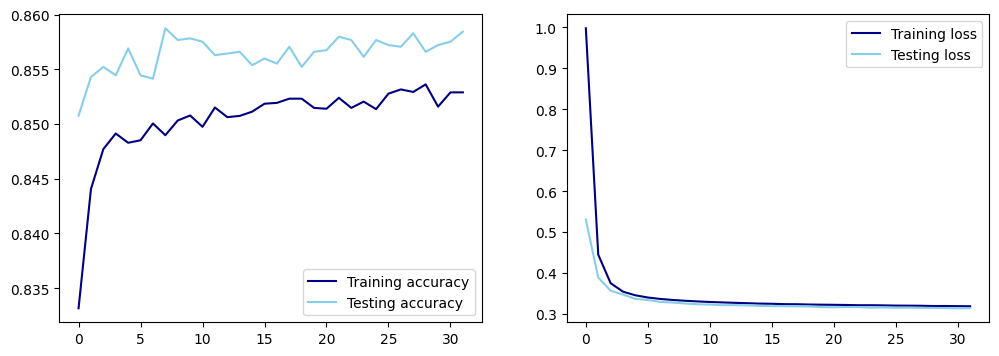

In [25]:
# Visualize the loss and accuracy

fig, ax = plt.subplots(1,2,figsize=(12,4))

# Extract history
train_acc = history.history['accuracy']
test_acc = history.history['val_accuracy']
train_loss = history.history['loss']
test_loss = history.history['val_loss']

ax[0].plot(train_acc, label = 'Training accuracy', color = 'navy')
ax[0].plot(test_acc, label = 'Testing accuracy', color = 'skyblue')
ax[0].legend()

ax[1].plot(train_loss, label = 'Training loss', color = 'navy')
ax[1].plot(test_loss, label = 'Testing loss', color = 'skyblue')
ax[1].legend();

----

## Scale using the whole dataset and transform the test

In [26]:
# Scale the whole dataset
whole_sc = StandardScaler()
Z = whole_sc.fit_transform(X)

In [27]:
# Read test_cleaned.csv
test = pd.read_csv('../data/test_cleaned.csv', index_col = [0])

In [28]:
# Dummy test
test = pd.get_dummies(data=test, 
                      columns = ['native_country','workclass','occupation',
                              'education','relationship','marital_status'],
                      drop_first = True)

In [29]:
# Check
test.shape

(16281, 17)

In [30]:
# Scale
test_sc = whole_sc.transform(test)

---

## Retrain whole dataset

In [31]:
# Train with default
final_model = XGBClassifier(colsample_bytree = gs.best_params_['colsample_bytree'], 
                   learning_rate = gs.best_params_['learning_rate'], 
                   max_depth = gs.best_params_['max_depth'],
                   n_estimators = gs.best_params_['n_estimators'])
final_model.fit(Z,y)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.6,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

---

## Generate Prediction 

In [32]:
y_pred = final_model.predict(test_sc)

In [33]:
submission = pd.DataFrame(data=y_pred,columns=['wage'])

In [34]:
submission.to_csv('../../goodfastcheap_check/XGB_predictions.csv',index=False)

In [35]:
# Final model is XGBoost with fine-tuned parameters
# Submission F1-score 0.9131

---

## Generate prediction NN

In [36]:
y_pred = model.predict(test_sc)

509/509 [==============================] - 0s 277us/step


In [37]:
results = pd.DataFrame(y_pred)

In [38]:
results['wage'] = results[0].apply(lambda x : 1 if x > 0.5 else 0)

In [39]:
submission = pd.DataFrame(data=results['wage'],columns=['wage'])

In [40]:
submission.to_csv('../data/FNN_predictions.csv',index=False)

In [41]:
# FNN final model
# Submission F1-score 0.9286